<a href="https://colab.research.google.com/github/GabrielCdev/HELP_International_Analysis/blob/main/HELP_International_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 2

##HELP International
"A HELP International é uma ONG humanitária internacional que está empenhada em combater a pobreza e fornecer às pessoas de países atrasados ​​serviços básicos e alívio durante o período de desastres e calamidades naturais."

Base para a atividade: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

###....:::: Membros ::::....
Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protasio

##Objetivo:
Realizar EDA, pré-processamento, agrupar utilizando as técnicas de agrupamento apresentadas na disciplina, analisar os grupos encontrados e selecionar 5 países que mais precisam de ajuda internacional.


#Importação das bibliotecas necessárias

In [1]:
# Bibliotecas Principais
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

#Importação dos dados

In [2]:
# Importação do dataset
help_df = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/HELP_International_Analysis/main/dataset/Country-data.csv')

#Visualização dos dados

In [3]:
help_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
help_df.tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [5]:
help_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#Identificação das variáveis

- country: Nome do país;
- child_mort: Morte de crianças menores de 5 anos por 1000 nascidos vivos;
- exports: Exportações de bens e serviços per capita. Dado como % de idade do PIB per capita;
- health: Gasto total com saúde per capita. Dado como % de idade do PIB per capita;
- imports: Importações de bens e serviços per capita. Dado como % de idade do PIB per capita;
- Income: Renda líquida por pessoa;
- Inflation: A medição da taxa de crescimento anual do PIB Total;
- life_expec: O número médio de anos que uma criança recém-nascida viveria se os atuais padrões de mortalidade permanecessem os mesmos;
- total_fer: O número de filhos que nasceriam de cada mulher se as taxas atuais de fecundidade por idade permanecessem as mesmas;
- gdpp: O PIB per capita. Calculado como o PIB total dividido pela população total.

#Análise exploratória

##Verificação de dados duplicados

In [6]:
help_df[help_df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


##Verificação de dados nulos

In [7]:
help_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##Distribuição dos dados

In [8]:
help_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##Alteração do index

In [9]:
help_df.set_index('country', inplace=True)

##Análise univariada

###Visualização da frequência de cada atributo quantitativo

In [10]:
help_df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

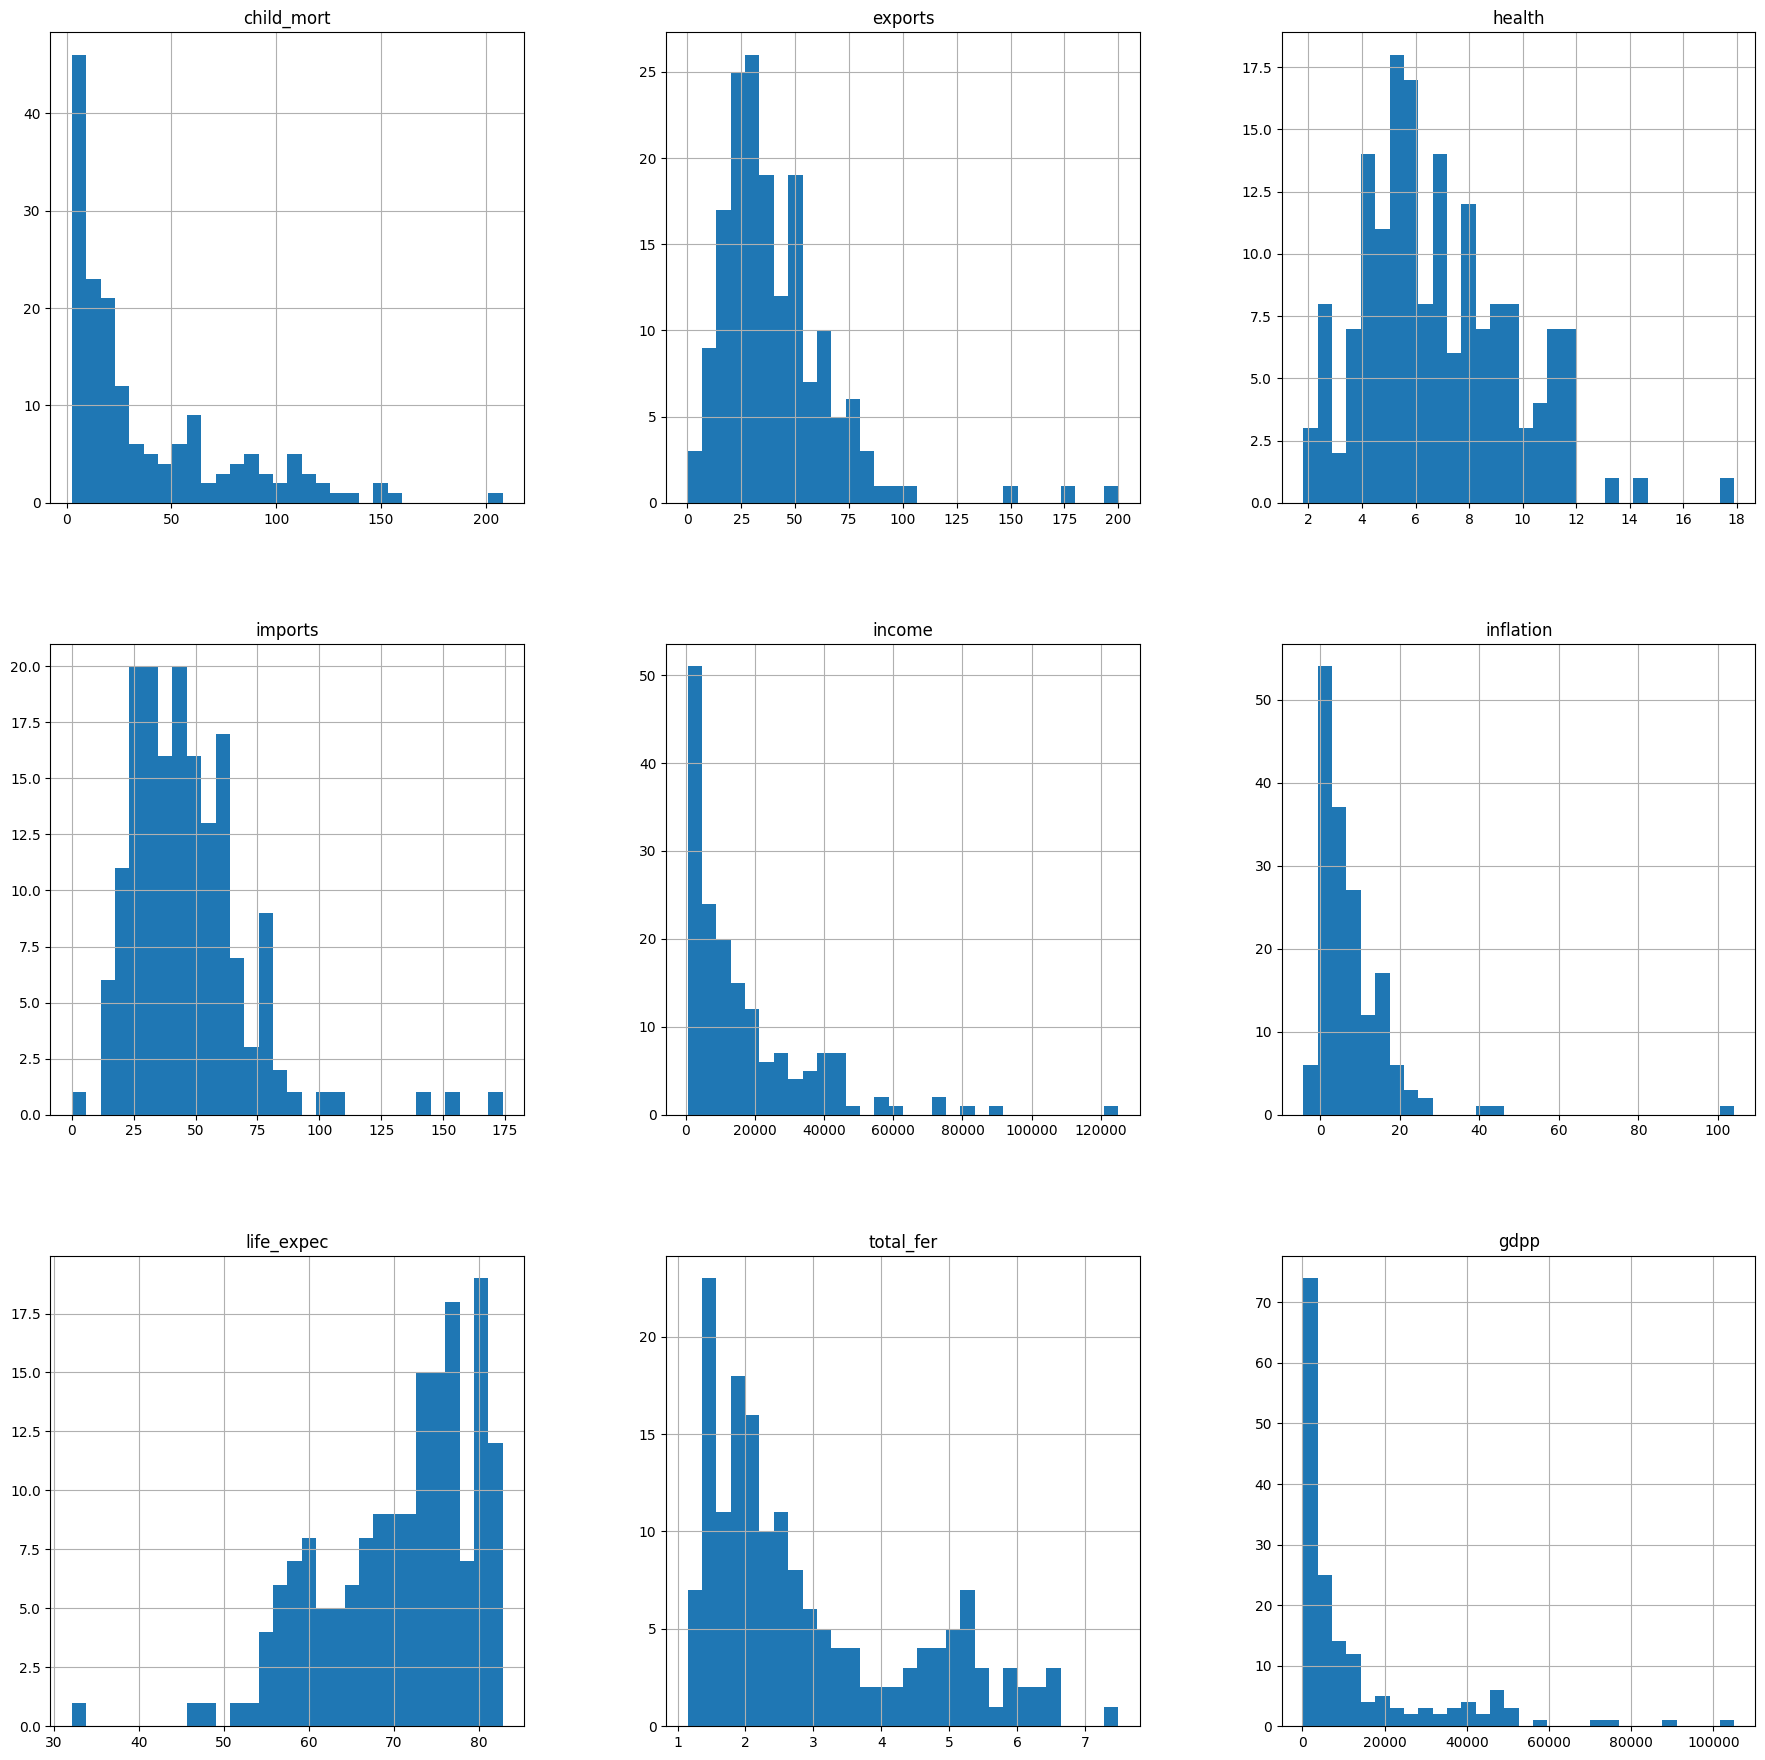

In [11]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
            'life_expec', 'total_fer', 'gdpp']
help_df[features].hist(figsize=(22, 22), bins=30);

In [12]:
help_df[help_df['child_mort'] > 150].value_counts()

child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp
160.0       16.8     13.10   34.5     1220    17.20      55.0        5.20       399     1
208.0       15.3     6.91    64.7     1500    5.45       32.1        3.33       662     1
dtype: int64

In [13]:
help_df[help_df['life_expec'] < 50].value_counts()

child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp
99.7        39.4     11.10   101.0    2380    4.15       46.5        3.30       1170    1
149.0       11.8     3.98    26.5     888     2.01       47.5        5.21       446     1
208.0       15.3     6.91    64.7     1500    5.45       32.1        3.33       662     1
dtype: int64

Com os histogramas, podemos extrair as seguintes informações:

- 30% dos países neste dataset possui alta taxa de mortalidade infantil (> 50)
>  ref: https://tabnet.datasus.gov.br/cgi/idb2000/fqc01.htm
- Mais de 95% dos países tem investimentos menores que 12% em saúde;
- Apenas 8 países (apróx.: 5%) possuem renda líquida e PIB per capta superior a 50.000;
- Apenas 1 país possui inflação acima de 50 pontos;
- Cerca de 4% dos países possuem expectativa de vida abaixo de 55 anos;
- A maior parte dos países concentra-se numa taxa de fecundidade de 1 a 6 filhos.

##Análise multivariada

<Axes: >

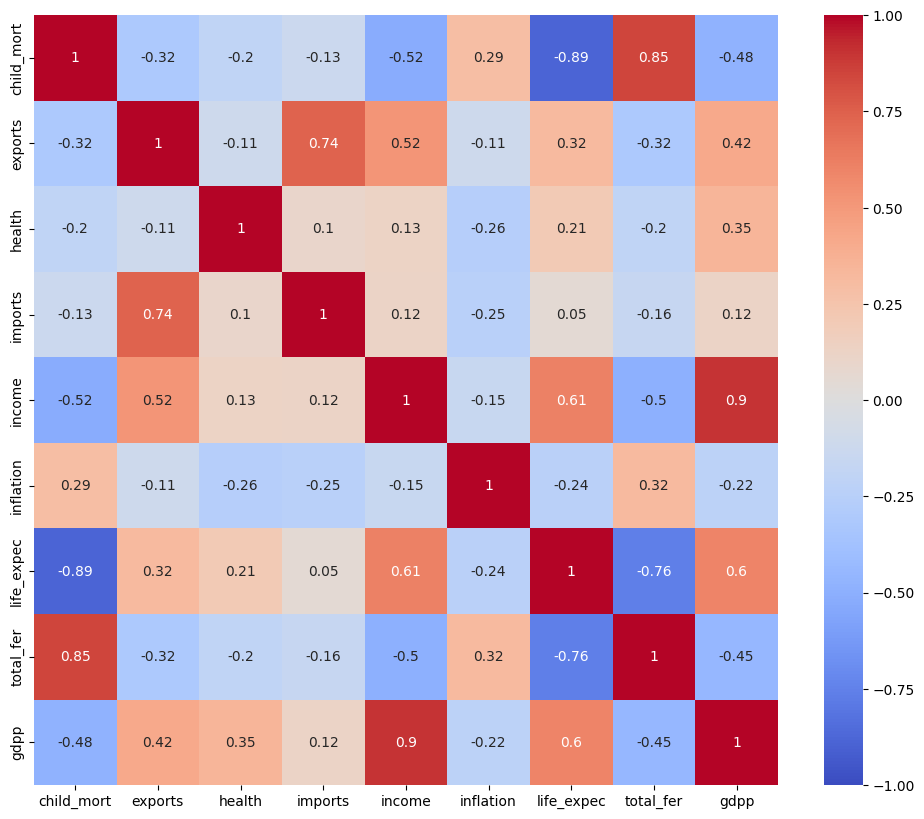

In [14]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(help_df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

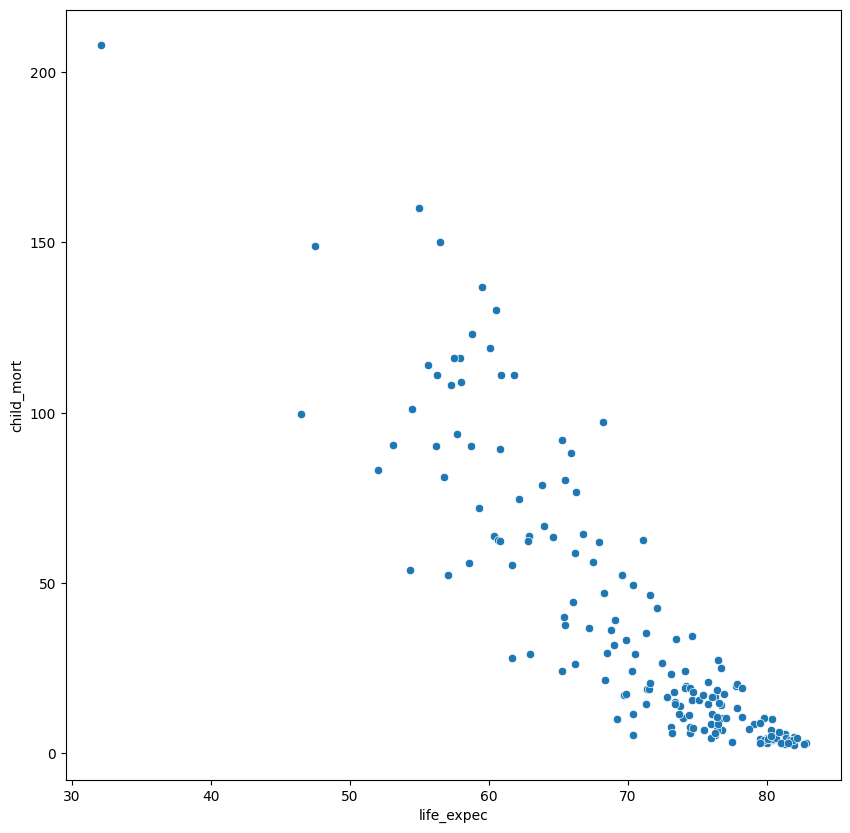

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=help_df, x='life_expec', y='child_mort')
plt.show()

A partir desta análise podemos inferir que quanto menor a expectativa de vida a taxa de mortalidade infantil é muito maior.

In [22]:
backup = help_df.copy()

In [24]:
help_df.drop(columns=['life_expec', 'income'], inplace=True)

KeyError: ignored

In [20]:
help_df

,child_mort,exports,health,imports,inflation,total_fer,gdpp
country,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,9.44,5.82,553
Albania,16.6,28.0,6.55,48.6,4.49,1.65,4090
Algeria,27.3,38.4,4.17,31.4,16.10,2.89,4460
Angola,119.0,62.3,2.85,42.9,22.40,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,1.44,2.13,12200
...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2.62,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,45.90,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,12.10,1.95,1310


<Axes: >

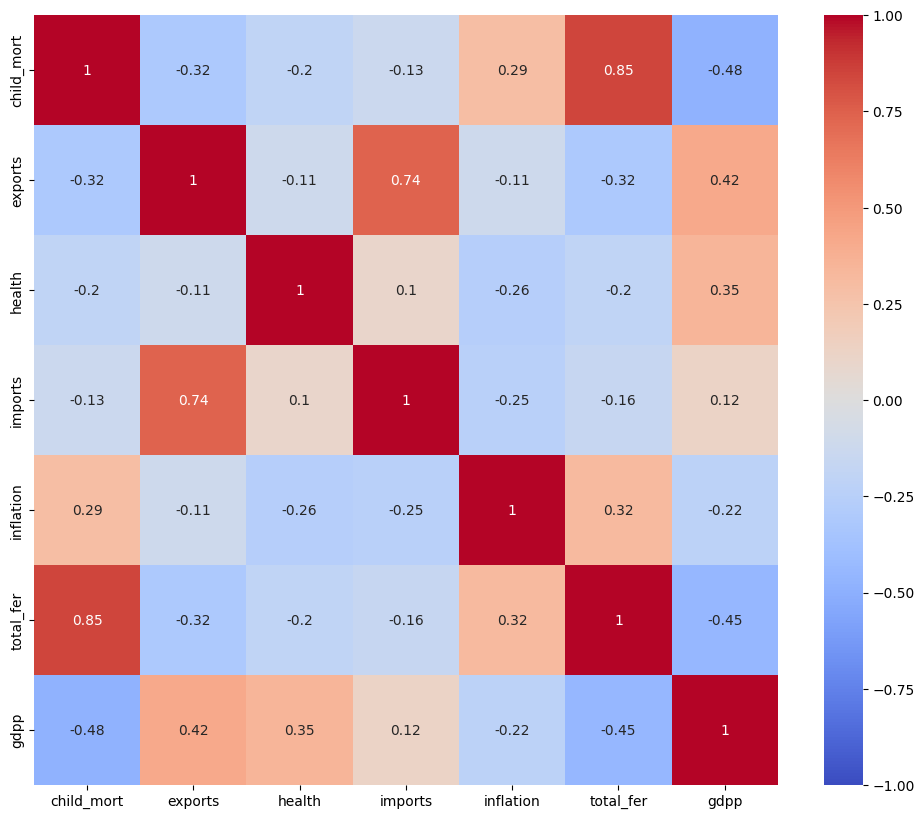

In [21]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(help_df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')